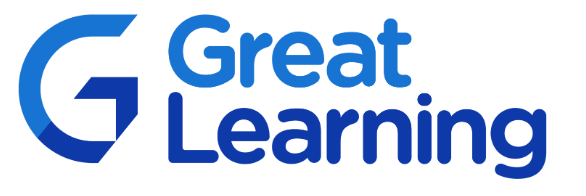

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

--------------
# <font color='blue'> Machine Learning - Supervised Learning</font> <font color='Green'>- Logistic Regression </font>
--------------

## <font color='blue'> Table of Contents </font>
- ### <font color='blue'> Importing Libraries and dataset </font>
- ### <font color='blue'> Basic data exploration </font>
- ### <font color='blue'> Data Visualization </font>
- ### <font color='blue'> Feature Engineering </font>
- ### <font color='blue'> Train-Test Split </font>
- ### <font color='blue'> Logistic Regression using sklearn </font>
- ### <font color='blue'> Model Evaluation and conclusion </font>


<font size=4 color='Green'> **Logistic Regression** </font>
- <font size=3 > It is used for predicting the categorical dependent variable using a given set of independent variables
- <font size=3 > Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value
- <font size=3 >It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1
- <font size=3 >Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems
- <font size=3 >In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1)
- <font size=3 >The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc
- <font size=3 >Logistic Regression is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets
- <font size=3 > Logistic Regression can be used to classify the observations using different types of data and can easily determine the most effective variables used for the classification
- <font size=3 > Logistic regression equation is:
  - log ( y / 1 - y) = b0 + b1*x1 + b2*x2 + .... + bn*xn

<font size=4 color='Green'> **Logistic Regression Case Study Description:** </font>

Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 


This dataset consists of eighteen columns
- **HeartDisease:** Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- **BMI:** Body Mass Index (BMI)
- **Smoking:** smoked at least 100 cigarettes in your entire life
- **AlcoholDrinking:** Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- **Stroke:** Ever had a stroke?
- **PhysicalHealth:** physical health, which includes physical illness and injury
- **MentalHealth:** for how many days during the past 30 days was your mental health not good?
- **DiffWalking:** Do you have serious difficulty walking or climbing stairs?
- **Sex:** male or female?
- **AgeCategory**: Fourteen-level age category
- **Race:** Imputed race/ethnicity value
- **Diabetic:** diabetes?
- **PhysicalActivity:** Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- **GenHealth:** Would you say that in general your health is good, fine or excellent?
- **SleepTime:** On average, how many hours of sleep do you get in a 24-hour period?
- **Asthma:** you had asthma?
- **KidneyDisease:** Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- **SkinCancer:** Ever had skin cancer?

Dataset source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount

<font size=4 color='Green'> **Objective:** </font> <font size=3 >  The Goal is to use a logistic regression model to classify whether a person has a heart disease or not based on the provided input features.
-----------

<font color='Green' size=4>  1. Importing Libraries <font color='Green' size=4> 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

<font color='Green' size=4>  2. Basic Data Exploration <font color='Green' size=4> 

In [ ]:
df = pd.read_csv('heart_data.csv')

In [ ]:
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [ ]:
# Lets check basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

<font size=4> **Inference** </font>
- The output shows that we have around 319795 entries with 18 columns. 
- We have 14 object type data and 4 float type data

In [ ]:
# Checking missing values
file_nullcols = df.isnull().sum()
file_nullcols

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

<font size=4> **Inference** </font>
- There are no null values in the dataset

In [ ]:
# Lets check the statistical summary of the data
df.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

In [ ]:
# let's check the unique values for each features
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

<font size=4 color='Green'> 3. Data Visualization

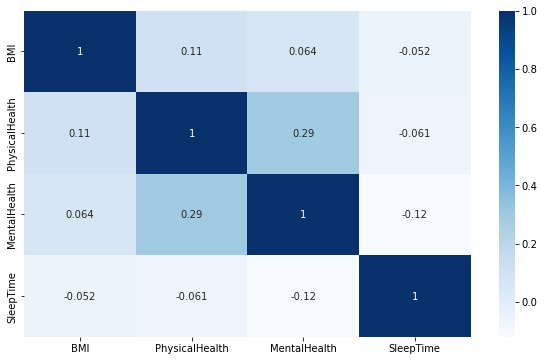

In [ ]:
# lets visualize the correlation using heatmap
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.show()

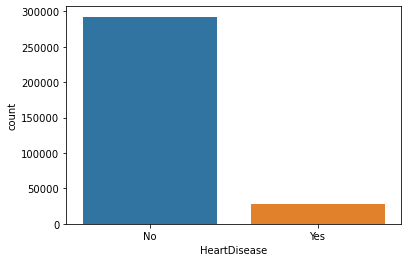

In [ ]:
# Let's check the count of target variable
sns.countplot(x = 'HeartDisease', data = df)
plt.show()

In [ ]:
# Numerical Features in the dataset
numeric_features = df.select_dtypes(include = [np.number])
numeric_features.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

In [ ]:
# Understand the effect/contribution of BMI value in causing Heart Disease
import plotly.express as px
fig = px.histogram(df, x = "BMI", color = "HeartDisease", nbins = 20, hover_data = df.columns, text_auto = True)
fig

<font size=4> **Inference** </font>
    
From the above plots we can observe that:
 - With BMI values ranging between 20 and 29.99 the number of patients possibly having heart disease is less. The values above or below this range show a trend that the patients possibility to not have heart disease is decreasing.

In [ ]:
# Categorical features in the dataset
categorical_features = df.select_dtypes(include = [np.object])
categorical_features.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

<font size=3>  **Let's look at the distribution of the number of people with heart disease from various factors**


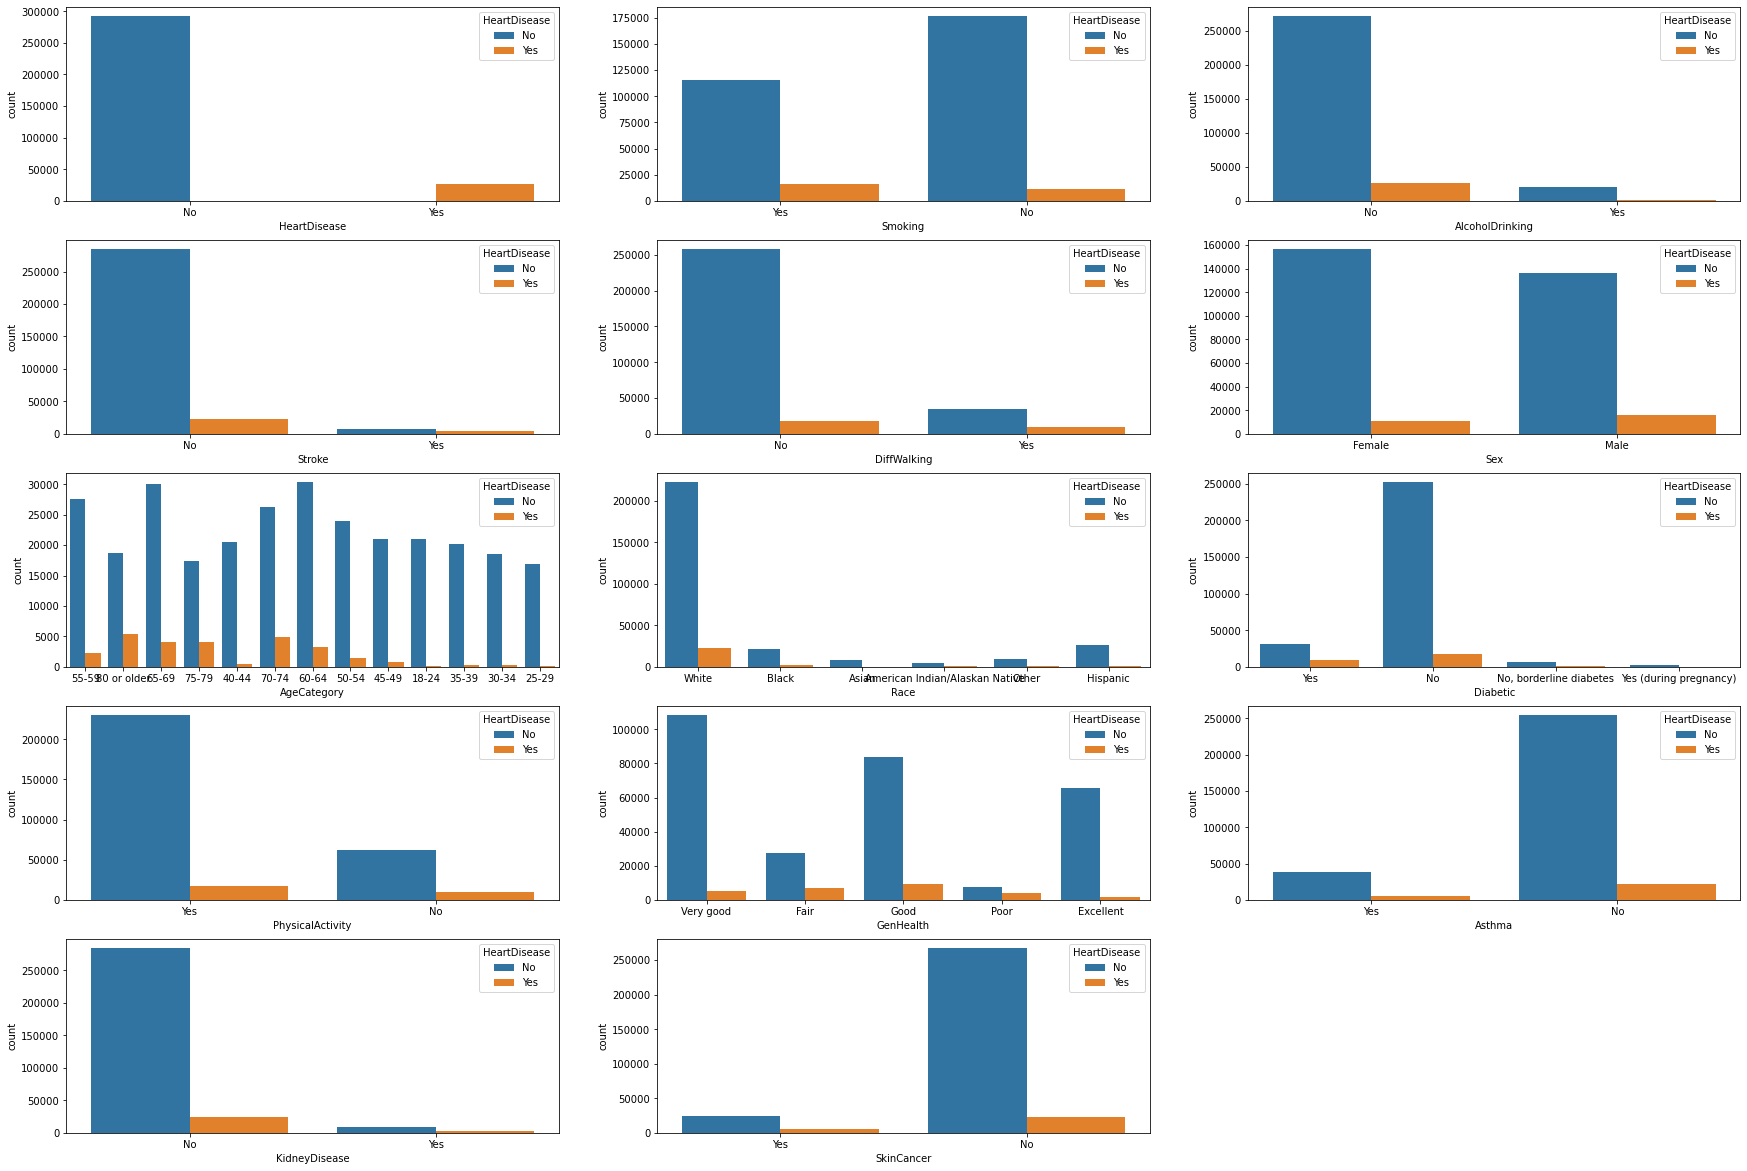

In [ ]:
i = 1
plt.figure(figsize = (30,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature,hue = 'HeartDisease' , data = df)
    i += 1

<font size=4> **Inference** </font>
- From the plot we can observe that:
- People who smoke have higher chances of heart diesease than no smokers
- Male are more prone to suffer from heart diseases as compared to females
- People with age limit in between 55-75 has higher chances of getting heart diseases
- If person has difficulty in walking or climbing stairs there is a high probability that he or she is suffering from some heart disease

<font size=4 color='Green'> 4. Feature Engineering

<font size=3> **There are columns with only two categorical values , let's encode all binary Categorical columns.**

In [ ]:
df1 = df.copy()

df1 = df1[df1.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })

## Type conversion of feaature Diabetic to integer
df1['Diabetic'] = df1['Diabetic'].astype(int)

In [ ]:
df1.head()

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  AgeCategory   Race  Diabetic  \
0          30.0            0    0        55-59  White         1   
1           0.0            0    0  80 or older  White         0   
2          30.0            0    1        65-69  White         1   
3           0.0            0    0        75-79  White         0   
4           0.0            1    0        40-44  White         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1  Very good        5.0       1              0           1  
1                 1  Very good        7.0       0              0           0  
2                 1       Fair        8.0       1              0           0  
3                 0       Good        6.0       0              0           1  
4                 1  Very good        8.0       0              0           0

<font size=3> **Label Encoding all categorical columns with more than 2 values**

In [ ]:
# Creating an instance of the label encoder class
le = LabelEncoder()

# label encoding all the categorical columns that have more than 2 unique values
df1['AgeCategory'] = le.fit_transform(df1['AgeCategory'])
df1['Race'] = le.fit_transform(df1['Race'])
df1['GenHealth'] = le.fit_transform(df1['GenHealth'])

In [ ]:
df1.head()

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          30.0            0    0            7     5         1   
1           0.0            0    0           12     5         0   
2          30.0            0    1            9     5         1   
3           0.0            0    0           11     5         0   
4           0.0            1    0            4     5         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          4        5.0       1              0           1  
1                 1          4        7.0       0              0           0  
2                 1          1        8.0       1              0           0  
3                 0          2        6.0       0              0           1  
4                 1          4        8.0       0              0           0

<font size=4 color='Green'>    5. Train-test split

In [ ]:
# Dividing Dataset into Training and Test Set
# independent variables
X = df1.iloc[:,1:].values
# dependent variable
y = df1.iloc[:,0].values

In [ ]:
# Checking the count of records having heart disease or not(0 and 1)
df1["HeartDisease"].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [ ]:
# train_test_split() is used to divide dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (255836, 17)
Shape of testing feature: (63959, 17)
Shape of training label: (255836,)
Shape of training label: (63959,)


<font size=4 color='Green'>   Feature Scaling

In [ ]:
# declaring an object of standardscaler class
sc = StandardScaler()

# fit_transform() method first trains the Scaler on dataset and then transforms it between 0 and 1
X_train = sc.fit_transform(X_train)

# transform() method only transforms the dataset based on what it has learnt on the dataset before
X_test = sc.transform(X_test)

<font size=4 color='Green'>   6. Logistic Regression using sklearn Library <font size=4 color='Green'>  

In [ ]:
# Create an instance
log_reg = LogisticRegression()
# Training
log_reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Check for prediction results
y_pred = log_reg.predict(X_test)

In [ ]:
# Print the intercept of the model and the coefficients of the features
print('Intercept of the logistic model fitted is: ',log_reg.intercept_)
print('Coefficients of the features are: ',log_reg.coef_)

Intercept of the logistic model fitted is:  [-3.05904888]
Coefficients of the features are:  [[ 0.08959069  0.22142655 -0.06513429  0.21779658  0.17115848  0.0877905
   0.14061446  0.36585616  1.00842881  0.03316344  0.2079756  -0.03944105
  -0.04222279 -0.04660914  0.12054584  0.12720806  0.03211996]]


In [ ]:
# Below code to show the column name along with the coefficient of the logistic model.

X = df.drop('HeartDisease', axis = 1)
# Create lists
column_labels = X.columns.tolist()
coef = log_reg.coef_.squeeze().tolist()

# Zip together
labels_coef = list(zip(column_labels, coef))

# Verify the result
print(labels_coef)

[('BMI', 0.0895906892075255), ('Smoking', 0.22142654769334882), ('AlcoholDrinking', -0.06513428672148741), ('Stroke', 0.21779657543249456), ('PhysicalHealth', 0.17115847924178115), ('MentalHealth', 0.08779050378803128), ('DiffWalking', 0.14061445793025643), ('Sex', 0.36585616335758675), ('AgeCategory', 1.00842880948204), ('Race', 0.03316343543480699), ('Diabetic', 0.20797560360748804), ('PhysicalActivity', -0.03944105236364002), ('GenHealth', -0.04222278897151558), ('SleepTime', -0.04660914150076961), ('Asthma', 0.12054584375814956), ('KidneyDisease', 0.1272080585378179), ('SkinCancer', 0.03211995880858161)]


<font size=4> **Inference** </font>

From the above set of coefficents we see that BMI, Smoking, Stroke, PhysicalHealth, MentalHealth, DiffWalking, Sex, AgeCategory, Race, Diabetic, Asthma and Kidney Disease are the features which help in predicting whether or not the person can have heart disease or not.

In [ ]:
# Check for accuray of the model
accuracy_score(y_test,y_pred)

0.9170562391532076

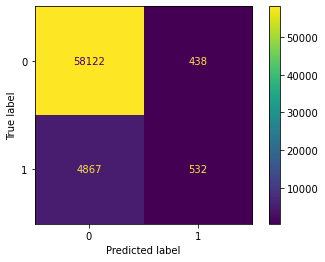

In [ ]:
## Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg, X_test, y_test)  
plt.show()

In [ ]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58560
           1       0.55      0.10      0.17      5399

    accuracy                           0.92     63959
   macro avg       0.74      0.55      0.56     63959
weighted avg       0.89      0.92      0.89     63959



<font size=4> **Inference** </font>
- We see that accuracy is 0.91, but recall for class-1 is quite low due to class imbalance

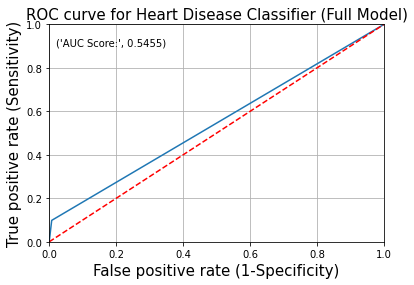

In [ ]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Heart Disease Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
                               
# plot the grid
plt.grid(True)

<font size=4> **Inference** </font>
- An AUC score of 0.54 signifies that the model is not good.
- It is not able to correctly classify whether the individual has Heart Disease or not with an accuracy
--------------------

<font size=4 color='Green'>  Plotting the loss convergence curve.

In [ ]:
# Defining the sigmoid function
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [ ]:
# Reshaping train test split(X_train,X_test,y_train,y_test)

X_train = X_train.T
y_train = y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
y_test = y_test.reshape(1, X_test.shape[1])

In [ ]:
print('Shape of X_train', X_train.shape)
print('Shape of y_train', y_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (17, 255836)
Shape of y_train (1, 255836)
Shape of X_test (17, 63959)
Shape of y_test (1, 63959)


In [ ]:
# Function to calculate the cost function

def model(X_train, y_train, learning_rate, iterations):
  m = X_train.shape[1]
  n = X_train.shape[0]
  W = np.zeros((n,1))
  B = 0
  cost_list = []
  for i in range (iterations):
    Z = np.dot(W.T, X_train) + B
    A = sigmoid(Z)

    cost = -(1/m) * np.sum(y_train * np.log(A) + (1 - y_train) * np.log(1 - A))

    dW = (1/m) * np.dot(A - y_train, X_train.T)
    dB = (1/m) * np.sum(A - y_train)

    W = W - learning_rate * dW.T
    B = B - learning_rate * dB

    cost_list.append(cost)

    if(i%(iterations/10) == 0):
      print('Cost after', i , 'iteration is: ', cost)
  
  return W, B, cost_list

In [ ]:
iterations = 10000
learning_rate = 0.005
W,B,cost_list = model(X_train, y_train, learning_rate = learning_rate, iterations = 10000)

Cost after 0 iteration is:  0.693147180559945
Cost after 1000 iteration is:  0.3353103888180221
Cost after 2000 iteration is:  0.27591238680168123
Cost after 3000 iteration is:  0.2565956961847055
Cost after 4000 iteration is:  0.24794923982963926
Cost after 5000 iteration is:  0.2433068391628203
Cost after 6000 iteration is:  0.24050895102982828
Cost after 7000 iteration is:  0.238685412024648
Cost after 8000 iteration is:  0.23742939858413994
Cost after 9000 iteration is:  0.2365288289072141


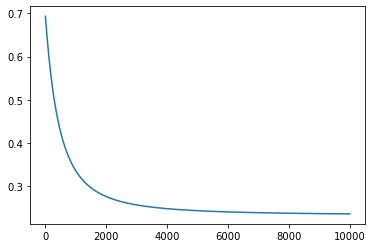

In [ ]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

<font size=4 color='green'> **Conclusions:** </font> 

<font size=3> **From EDA:-**
  - With BMI values ranging between 20 and 29.99 the number of patients possibly having heart disease is less. The values above or below this range show a trend that the patients possibility to not have heart disease is decreasing.
  - From the plot we can observe that:
  - People who smoke have higher chances of heart diesease than no smokers
  - Male are more prone to suffer from heart diseases as compared to females
  - People with age limit in between 55-75 has higher chances of getting heart diseases
  - If person has difficulty in walking or climbing stairs there is a high probability that he or she is suffering from some heart disease.

<font size=3> **From Model:-**
 - BMI, Smoking, Stroke, PhysicalHealth, MentalHealth, DiffWalking, Sex, AgeCategory, Race, Diabetic, Asthma and Kidney Disease are the features which help in predicting whether or not the person can have heart disease or not.
 - We see that accuracy is 0.91, but recall for class-1 is quite low due to class imbalance
 - An AUC score of 0.54 signifies that the model is not good.
 - It is not able to correctly classify whether the individual has Heart Disease or not with an accuracy


----
## Happy Learning:)
----